In [42]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from geopandas import GeoDataFrame

In [43]:
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from IPython.display import HTML
import calendar
import plotly.io as pio
import datetime as dt


In [44]:
import statsmodels.api as sm
import geopandas as gpd
import matplotlib.colors as colors
from matplotlib.colors import ListedColormap
from matplotlib.colors import BoundaryNorm
import warnings
warnings.filterwarnings("ignore")

import ipywidgets as widgets
from IPython.display import display, clear_output

In [45]:
vacc=pd.read_csv("C:/Users/Prijita/Downloads/Assign5/Vaccine_generate.csv")
vacc1=pd.read_csv("C:/Users/Prijita/Downloads/Assign5/Vaccine_Statewise.csv")
vacc2=pd.read_csv("C:/Users/Prijita/Downloads/Assign5/vacc_dose.csv")
vacc3=pd.read_csv("C:/Users/Prijita/Downloads/Assign5/total_vacc.csv")
vacc4=pd.read_csv("C:/Users/Prijita/Downloads/Assign5/Covid-19_vacc.csv")
vacc5=pd.read_csv("C:/Users/Prijita/Downloads/Assign5/num_vacc.csv")

In [46]:
res=widgets.Text(placeholder='Yes/No')

In [47]:
res1=widgets.Text(placeholder='Yes/No')

In [48]:
button_send=widgets.Button(description='Submit', tooltip='Submit',style={'description_width': 'initial'})
output=widgets.Output()

def on_button_clicked(event):
    with output:
        clear_output()
        print("Successfully submitted your response.")
        #print(f"Hi {name.value}")
        if res.value=='Yes' and res1.value=='Yes':
            print("Congratulations! You are now safe againt COVID-19. Please don't forget to wear masks when you go out")
        elif res.value=='Yes' and res1.value=='No':
            print("Congratulations! You got your first dose. Get the second dose as soon as possible.")
        else:
            print("Please get vaccinated as soon as possible. Vaccines are purely safe and they are effective against COVID-19.")
        
button_send.on_click(on_button_clicked)
vbox_result=widgets.VBox([button_send,output])

In [49]:
text_0=widgets.HTML(value="<h1>Welcome to COVID-19 Vaccination Dashboard</h1>")
text_1=widgets.HTML(value="<h4>Did you get your first dose of vaccination?</h4>")
text_2=widgets.HTML(value="<h4>Did you get your second dose of vaccination?</h4>")
vbox_text=widgets.VBox([text_0,text_1,res,text_2,res1,vbox_result])

In [50]:
page=widgets.HBox([vbox_text])
display(page)

In [51]:
fp=r'C:/Users/Prijita/Downloads/Assign5/india-polygon.shp'
data=gpd.read_file(fp)

In [52]:
dat=data.drop(columns=['id'])

In [53]:
dat.sort_values(by=['st_nm'],inplace=True)

In [54]:
merged=vacc3.set_index('States').join(dat.set_index('st_nm'))

In [55]:
merged['Tot_vacc']=merged['Tot_vacc'].replace(np.nan,-1)

In [56]:
merged1=GeoDataFrame(merged)

### This plot shows the totatl number of vaccines ordered in each state

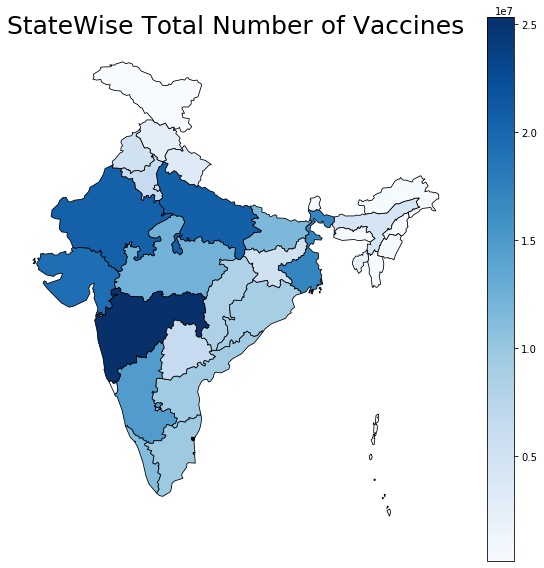

In [57]:
fig,ax=plt.subplots(1,figsize=(10,10))
ax.axis('off')
ax.set_title('StateWise Total Number of Vaccines',fontdict={'fontsize':'25','fontweight':'10'})
variable='Tot_vacc'
merged1.plot(column=variable,cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0', legend=True,markersize=[39.739192, -104.990337]);

In [58]:
fig = go.Figure(data=go.Choropleth(
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locationmode='geojson-id',
    locations=vacc3['States'],
    z=vacc3['Tot_vacc'],

    autocolorscale=False,
    colorscale='Reds',
    marker_line_color='peachpuff',

    colorbar=dict(
        title={'text': "Total Vaccine"},

        thickness=15,
        len=0.35,
        bgcolor='rgba(255,255,255,0.6)',

        tick0=100000,
        dtick=5000000,

        xanchor='right',
        x=0.01,
        yanchor='bottom',
        y=0.05
    )
))

fig.update_geos(
    visible=False,
    projection=dict(
        type='conic conformal',
        parallels=[12.472944444, 35.172805555556],
        rotation={'lat': 24, 'lon': 80}
    ),
    lonaxis={'range': [68, 98]},
    lataxis={'range': [6, 38]}
)

fig.update_layout(
    title=dict(
        text="StateWise Total vaccines Aquired",
        xanchor='center',
        x=0.5,
        yref='paper',
        yanchor='bottom',
        y=1,
        pad={'b': 10}
    ),
    margin={'r': 0, 't': 30, 'l': 0, 'b': 0},
    height=550,
    width=550
)

fig.show()

### This plot shows the number of doses that were given between April 1-10 and April 11-20

In [59]:
vacc=vacc.fillna(0)

In [60]:
trace1 = go.Scatter(
    x = vacc["States"],
    y = vacc["April_1-10"],
    mode = 'lines+markers',
    name = 'April 1-10',
    marker = dict(color = 'rgba(255, 51, 51, 0.5)'),
    text = vacc.States)

trace2 = go.Scatter(
    x = vacc["States"],
    y = vacc["April_11-20"],
    mode = 'lines+markers',
    name = 'April 11-20',
    marker = dict(color = 'rgba(51, 102, 255, 0.5)'),
    text = vacc.States)

layout = dict(title = 'Statewise vaccine doses',
             xaxis= dict(zeroline= False)
             )

data = [trace1, trace2]
fig = dict(data = data, layout = layout)

iplot(fig)

In [61]:
vacc2=vacc2.fillna(0)

In [62]:
merged2=vacc2.set_index('State').join(dat.set_index('st_nm'))

### The three plots below are used for compring the population and the 1st and 2nd dose people

In [63]:
merged3=GeoDataFrame(merged2)

### The three plots below are used for compring the population and the 1st and 2nd dose people

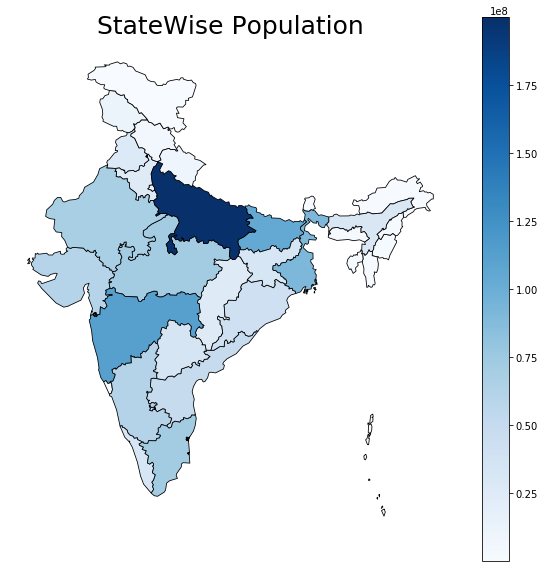

In [64]:
fig,ax=plt.subplots(1,figsize=(10,10))
ax.axis('off')
ax.set_title('StateWise Population',fontdict={'fontsize':'25','fontweight':'10'})
variable='Population'
merged3.plot(column=variable,cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0', legend=True,markersize=[39.739192, -104.990337]);

In [65]:
fig = go.Figure(data=go.Choropleth(
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locationmode='geojson-id',
    locations=vacc2['State'],
    z=vacc2['Population'],

    autocolorscale=False,
    colorscale='Reds',
    marker_line_color='peachpuff',

    colorbar=dict(
        title={'text': "Population"},

        thickness=15,
        len=0.35,
        bgcolor='rgba(255,255,255,0.6)',

        tick0=1000000,
        dtick=50000000,

        xanchor='right',
        x=0.01,
        yanchor='bottom',
        y=0.05
    )
))

fig.update_geos(
    visible=False,
    projection=dict(
        type='conic conformal',
        parallels=[12.472944444, 35.172805555556],
        rotation={'lat': 24, 'lon': 80}
    ),
    lonaxis={'range': [68, 98]},
    lataxis={'range': [6, 38]}
)

fig.update_layout(
    title=dict(
        text="StateWise Population",
        xanchor='center',
        x=0.5,
        yref='paper',
        yanchor='bottom',
        y=1,
        pad={'b': 10}
    ),
    margin={'r': 0, 't': 30, 'l': 0, 'b': 0},
    height=550,
    width=550
)

fig.show()

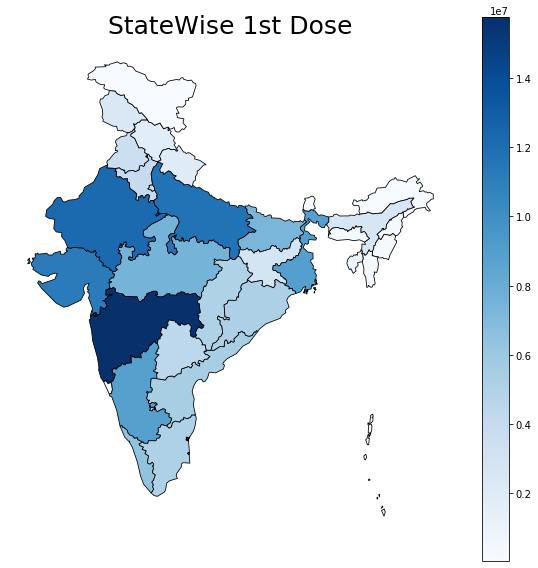

In [66]:
fig,ax=plt.subplots(1,figsize=(10,10))
ax.axis('off')
ax.set_title('StateWise 1st Dose',fontdict={'fontsize':'25','fontweight':'10'})
variable='1st_Dose'
merged3.plot(column=variable,cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0', legend=True,markersize=[39.739192, -104.990337]);

In [67]:
fig = go.Figure(data=go.Choropleth(
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locationmode='geojson-id',
    locations=vacc2['State'],
    z=vacc2['1st_Dose'],

    autocolorscale=False,
    colorscale='Reds',
    marker_line_color='peachpuff',

    colorbar=dict(
        title={'text': "1st Dose"},

        thickness=15,
        len=0.35,
        bgcolor='rgba(255,255,255,0.6)',

        tick0=10000,
        dtick=5000000,

        xanchor='right',
        x=0.01,
        yanchor='bottom',
        y=0.05
    )
))

fig.update_geos(
    visible=False,
    projection=dict(
        type='conic conformal',
        parallels=[12.472944444, 35.172805555556],
        rotation={'lat': 24, 'lon': 80}
    ),
    lonaxis={'range': [68, 98]},
    lataxis={'range': [6, 38]}
)

fig.update_layout(
    title=dict(
        text="People got 1st Dose",
        xanchor='center',
        x=0.5,
        yref='paper',
        yanchor='bottom',
        y=1,
        pad={'b': 10}
    ),
    margin={'r': 0, 't': 30, 'l': 0, 'b': 0},
    height=550,
    width=550
)

fig.show()

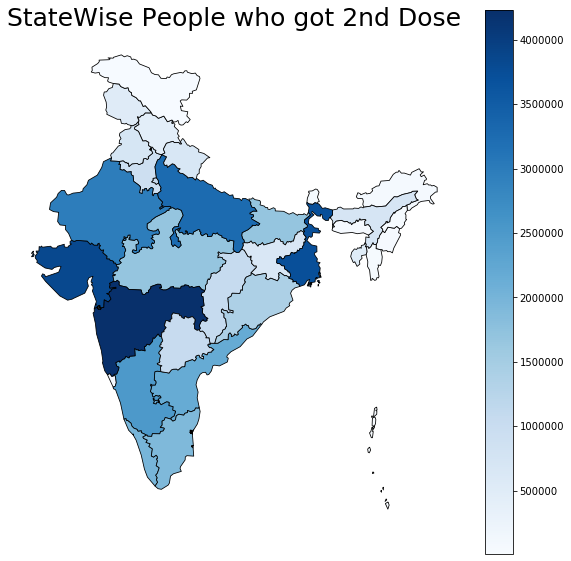

In [68]:
fig,ax=plt.subplots(1,figsize=(10,10))
ax.axis('off')
ax.set_title('StateWise People who got 2nd Dose',fontdict={'fontsize':'25','fontweight':'10'})
variable='2nd_Dose'
merged3.plot(column=variable,cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0', legend=True,markersize=[39.739192, -104.990337]);

In [69]:
fig = go.Figure(data=go.Choropleth(
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locationmode='geojson-id',
    locations=vacc2['State'],
    z=vacc2['2nd_Dose'],

    autocolorscale=False,
    colorscale='Reds',
    marker_line_color='peachpuff',

    colorbar=dict(
        title={'text': "2nd Dose"},

        thickness=15,
        len=0.35,
        bgcolor='rgba(255,255,255,0.6)',

        tick0=10000,
        dtick=500000,

        xanchor='right',
        x=0.01,
        yanchor='bottom',
        y=0.05
    )
))

fig.update_geos(
    visible=False,
    projection=dict(
        type='conic conformal',
        parallels=[12.472944444, 35.172805555556],
        rotation={'lat': 24, 'lon': 80}
    ),
    lonaxis={'range': [68, 98]},
    lataxis={'range': [6, 38]}
)

fig.update_layout(
    title=dict(
        text="People got 2nd Dose",
        xanchor='center',
        x=0.5,
        yref='paper',
        yanchor='bottom',
        y=1,
        pad={'b': 10}
    ),
    margin={'r': 0, 't': 30, 'l': 0, 'b': 0},
    height=550,
    width=550
)

fig.show()

### Comparing the rate of 1st dose and fully vaccinated people

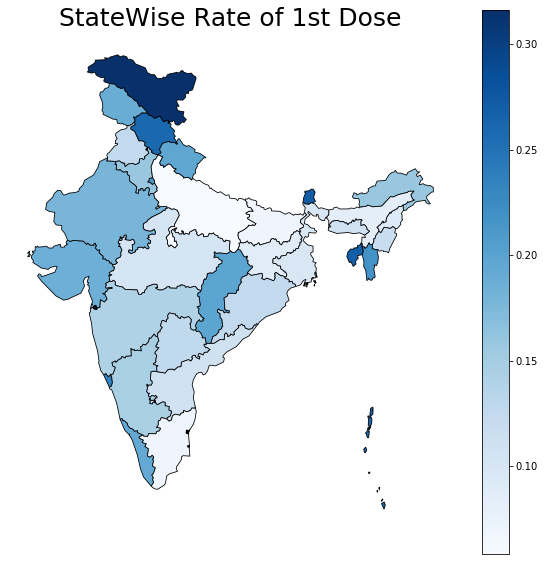

In [70]:
fig,ax=plt.subplots(1,figsize=(10,10))
ax.axis('off')
ax.set_title('StateWise Rate of 1st Dose',fontdict={'fontsize':'25','fontweight':'10'})
variable='Per_Dose1'
merged3.plot(column=variable,cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0', legend=True,markersize=[39.739192, -104.990337]);

In [71]:
fig = go.Figure(data=go.Choropleth(
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locationmode='geojson-id',
    locations=vacc2['State'],
    z=vacc2['Per_Dose1'],

    autocolorscale=False,
    colorscale='Reds',
    marker_line_color='peachpuff',

    colorbar=dict(
        title={'text': "Total Dose"},

        thickness=15,
        len=0.35,
        bgcolor='rgba(255,255,255,0.6)',

        tick0=0.0,
        dtick=0.05,

        xanchor='right',
        x=0.01,
        yanchor='bottom',
        y=0.05
    )
))

fig.update_geos(
    visible=False,
    projection=dict(
        type='conic conformal',
        parallels=[12.472944444, 35.172805555556],
        rotation={'lat': 24, 'lon': 80}
    ),
    lonaxis={'range': [68, 98]},
    lataxis={'range': [6, 38]}
)

fig.update_layout(
    title=dict(
        text="Rate of 1st Dose",
        xanchor='center',
        x=0.5,
        yref='paper',
        yanchor='bottom',
        y=1,
        pad={'b': 10}
    ),
    margin={'r': 0, 't': 30, 'l': 0, 'b': 0},
    height=550,
    width=550
)

fig.show()

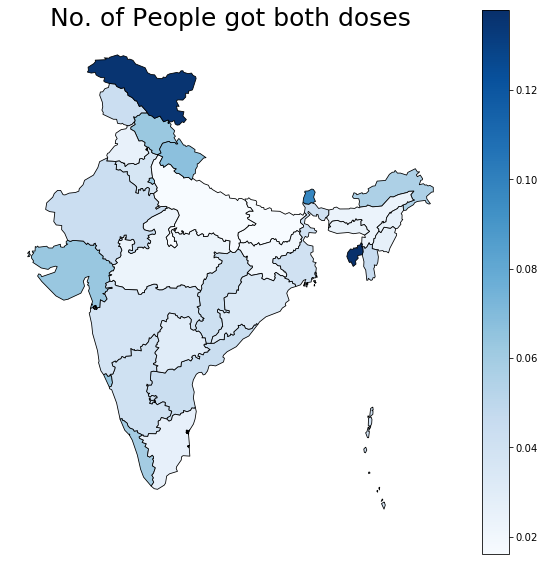

In [72]:
fig,ax=plt.subplots(1,figsize=(10,10))
ax.axis('off')
ax.set_title('No. of People got both doses',fontdict={'fontsize':'25','fontweight':'10'})
variable='Per_Dose_All'
merged3.plot(column=variable,cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0', legend=True,markersize=[39.739192, -104.990337]);

In [73]:
fig = go.Figure(data=go.Choropleth(
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locationmode='geojson-id',
    locations=vacc2['State'],
    z=vacc2['Per_Dose_All'],

    autocolorscale=False,
    colorscale='Reds',
    marker_line_color='peachpuff',

    colorbar=dict(
        title={'text': "Total Dose"},

        thickness=15,
        len=0.35,
        bgcolor='rgba(255,255,255,0.6)',

        tick0=0.0,
        dtick=0.05,

        xanchor='right',
        x=0.01,
        yanchor='bottom',
        y=0.05
    )
))

fig.update_geos(
    visible=False,
    projection=dict(
        type='conic conformal',
        parallels=[12.472944444, 35.172805555556],
        rotation={'lat': 24, 'lon': 80}
    ),
    lonaxis={'range': [68, 98]},
    lataxis={'range': [6, 38]}
)

fig.update_layout(
    title=dict(
        text="Rate of People got both Dose",
        xanchor='center',
        x=0.5,
        yref='paper',
        yanchor='bottom',
        y=1,
        pad={'b': 10}
    ),
    margin={'r': 0, 't': 30, 'l': 0, 'b': 0},
    height=550,
    width=550
)

fig.show()

### Bar plot for comparing 1st and 2nd Dose

In [74]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
trace1 = go.Bar(x=vacc2["State"],y=vacc2["1st_Dose"],name='1st Dose')
trace2 = go.Bar(x=vacc2["State"],y=vacc2["2nd_Dose"],name='2nd Dose')

data = [trace1, trace2]
plotly.offline.iplot({"data": data,"layout": go.Layout(barmode='group', title="1st Dose V/S 2nd Dose",width=800,height=500,)
})

### The below graph shows a comparison between total doses and wastage of the doses

In [75]:
trace1 = go.Scatter(
    x = vacc4["States"],
    y = vacc4["Doses"],
    mode = 'lines+markers',
    name = 'Doses',
    marker = dict(color = 'rgba(255, 51, 51, 0.5)'),
    text = vacc4.States)

trace2 = go.Scatter(
    x = vacc4["States"],
    y = vacc4["%_wastage"],
    mode = 'lines+markers',
    name = '% of wastage of vaccines',
    marker = dict(color = 'rgba(51, 102, 255, 0.5)'),
    text = vacc4.States)

layout = dict(title = 'Statewise Doses vs Wastage',
             xaxis= dict(zeroline= False)
             )

data = [trace1, trace2]
fig = dict(data = data, layout = layout)

iplot(fig)

### The below graph shows the wastage rate of vaccines

In [76]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
trace2 = go.Bar(x=vacc4["States"],y=vacc4["%_wastage"],name='% wastage')

data = [trace2]
plotly.offline.iplot({"data": data,"layout": go.Layout(barmode='group', title="Percentage of wastage of Doses",width=800,height=500,)
})

### The number of covaxin and covisheild vaccines ordered in the states

In [77]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
trace1 = go.Bar(x=vacc5["States"],y=vacc5["Covaxin"],name='Covaxin')
trace2 = go.Bar(x=vacc5["States"],y=vacc5["Covisheild"],name='Covisheild')

data = [trace1, trace2]
plotly.offline.iplot({"data": data,"layout": go.Layout(barmode='group', title="Covaxin V/S Covishield",width=800,height=500,)
})

In [78]:
vacc1=vacc1.fillna(0)

In [79]:
merged10=vacc1.set_index('State').join(dat.set_index('st_nm'))

In [80]:
merged11=GeoDataFrame(merged10)

### The below 2 graphs shows the vaccine cost state wise

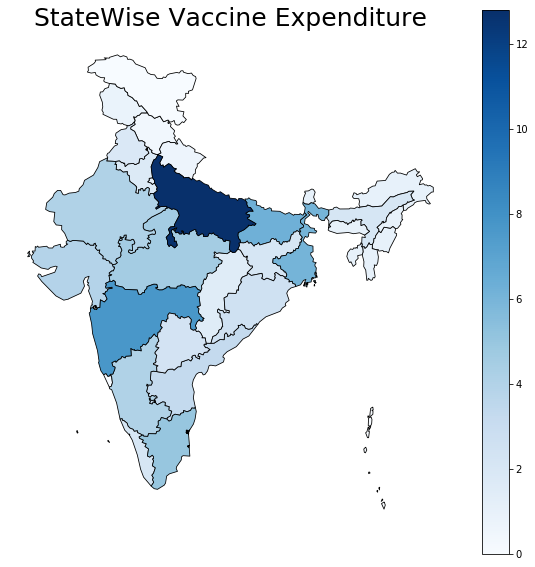

In [81]:
fig,ax=plt.subplots(1,figsize=(10,10))
ax.axis('off')
ax.set_title('StateWise Vaccine Expenditure',fontdict={'fontsize':'25','fontweight':'10'})
variable='Cost_Vaccine'
merged11.plot(column=variable,cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0', legend=True,markersize=[39.739192, -104.990337]);

In [82]:
fig = go.Figure(data=go.Choropleth(
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locationmode='geojson-id',
    locations=vacc1['State'],
    z=vacc1['Cost_Vaccine'],

    autocolorscale=False,
    colorscale='Greens',
    marker_line_color='peachpuff',

    colorbar=dict(
        title={'text': "Vaccine cost"},

        thickness=15,
        len=0.35,
        bgcolor='rgba(255,255,255,0.6)',

        tick0=0,
        dtick=1.5,

        xanchor='right',
        x=0.01,
        yanchor='bottom',
        y=0.05
    )
))

fig.update_geos(
    visible=False,
    projection=dict(
        type='conic conformal',
        parallels=[12.472944444, 35.172805555556],
        rotation={'lat': 24, 'lon': 80}
    ),
    lonaxis={'range': [68, 98]},
    lataxis={'range': [6, 38]}
)

fig.update_layout(
    title=dict(
        text="StateWise Vaccine Expenditure",
        xanchor='center',
        x=0.5,
        yref='paper',
        yanchor='bottom',
        y=1,
        pad={'b': 10}
    ),
    margin={'r': 0, 't': 30, 'l': 0, 'b': 0},
    height=550,
    width=550
)

fig.show()